In [48]:
import matplotlib.pyplot as plt
import os
import numpy as np
from tqdm import tqdm
from network_funcs import *
from qopt_funcs import *
import networkx as nx
import random
import time
import csv
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter

plt.rcParams['figure.figsize'] = [7,5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower#
plt.rcParams.update({'font.size': 18})

cmap = plt.get_cmap("tab10")   # dft sequence of colors
plt.rcParams['axes.formatter.use_mathtext'] = True        # orders of magnitude in the plots --> x10^n instead of 1e9 



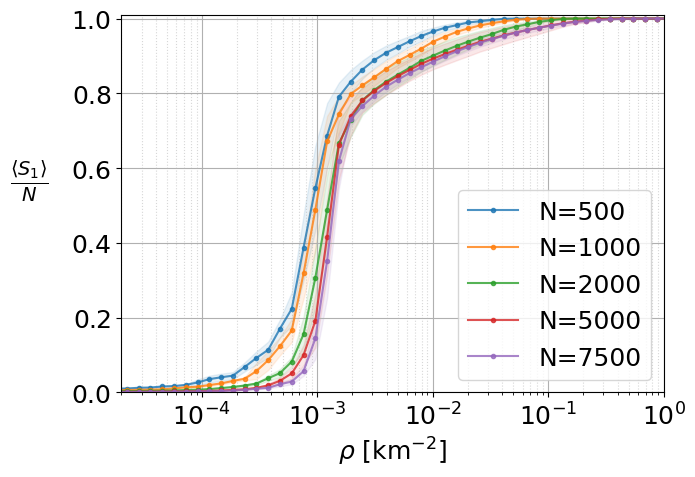

In [49]:
Ns = [500, 1000,2000,5000,7500]

plt.xscale('log')
plt.grid(which="major")
plt.grid(which="minor", alpha=0.5, ls=':')
#plt.title(r'connectivity $\langle S_1\rangle/N \quad$ ('+qkd+'-QKD)')
plt.xlabel(r'$\rho \ [$km$^{-2}]$')
plt.ylabel(r'$\frac{\langle S_1\rangle}{N}$', rotation=0, labelpad=30, fontsize = 20)
cmap = plt.get_cmap("tab10")   # dft sequence of colors
d_h=float('inf')

c=0
for i in range(len(Ns)):
    N=Ns[i]
    fn1 = 'cluster_outs/out_hybrid_rhos_conn_N%d_d_hyb' % N + str(d_h) +'_NX_wide_ratemin0_10nws.dat'
    data4 = np.loadtxt(fn1)
    rhos = data4[0]
    conn = data4[1]
    errc = data4[2]          # fluctuations of the relative size (0 to 1), we want the absolute
    plt.plot(rhos, conn, 'o-', label='N=%d'%N, alpha=0.8, markersize=3)
    #plt.errorbar(rhos, conn, errc , fmt=' ', color=cmap(c), alpha=.5)
    plt.fill_between(rhos, conn-errc, conn+errc, color=cmap(c), alpha=0.1)
    c += 1
plt.xlim(2E-5,1)    
plt.ylim(0,1.01)    
plt.legend()
plt.savefig('plots/CV_connectivities.png')

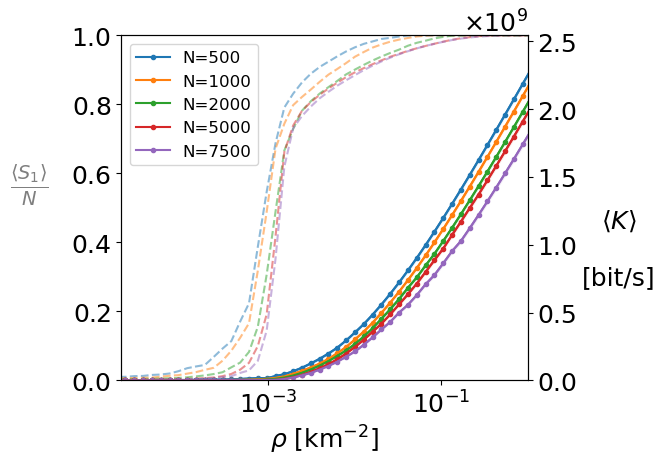

In [50]:
Ns = [500, 1000,2000,5000,7500]
 
ms = 3
d_h=float('inf')
cmap = plt.get_cmap("tab10")   # dft sequence of colors
   
#############################################
fig, ax1 = plt.subplots()

ax1.set_xlabel(r'$\rho\ $[km$^{-2}$]')
#ax2.grid(which="major", alpha=.5)
#ax2.grid(which="minor", alpha=0.5, ls=':')
ax2 = ax1.twinx()
ax2.set_xlim(1E-4,1E1)
ax1.set_ylabel(r'$\frac{\langle S_1\rangle}{N}$', rotation=0, labelpad=30, fontsize=20, alpha=0.5)
ax2.set_ylabel(r'$\langle K \rangle$'+'\n\n[bit/s]', rotation=0, labelpad=30)

c=0
for N in Ns:
    fn1 = 'cluster_outs/out_hybrid_rhos_conn_N%d_d_hyb' % N + str(d_h) +'_NX_wide_ratemin0_10nws.dat'
    data8 = np.loadtxt(fn1)

    rhos = data8[0]
    conn = data8[1]
    errc = data8[2]
    ax1.plot(rhos, conn, '--', color=cmap(c), alpha=.5)
    #ax1.fill_between(rhos, conn-errc, conn+errc, color=cmap(c), alpha=0.1)    
    
    ratedata= np.loadtxt('cluster_outs/out_hybrid_rhos_parK_N%d_d_hybinf_NX_wide_ratemin0_10nws.dat'%N)
    rhos = ratedata[0]
    rate = ratedata[1]
    errc = ratedata[2]
    ax2.plot(rhos, rate, 'o-', label='N=%d'%N, color=cmap(c), markersize=ms)
    plt.errorbar(rhos, rate, errc, fmt='', color=cmap(c))
    ax2.fill_between(rhos, rate-errc, rate+errc, color=cmap(c), alpha=0.1)

    c+=1

ax2.set_ylim(bottom=0)
ax1.set_ylim(0,1.0)

plt.xscale('log')
#plt.title(qkd+'-QKD')
# plt.xlabel(r'$\rho$\ [$km$^{-2}]')
cmap = plt.get_cmap("tab10")   # dft sequence of colors
# plt.grid(which="major", alpha=1)
# plt.grid(which="minor", alpha=0.5, ls=':')
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, fontsize=12)#, loc=4
plt.xlim(left=0.00002, right=1)
plt.tight_layout()
plt.savefig('plots/CV_rate_conn.png')

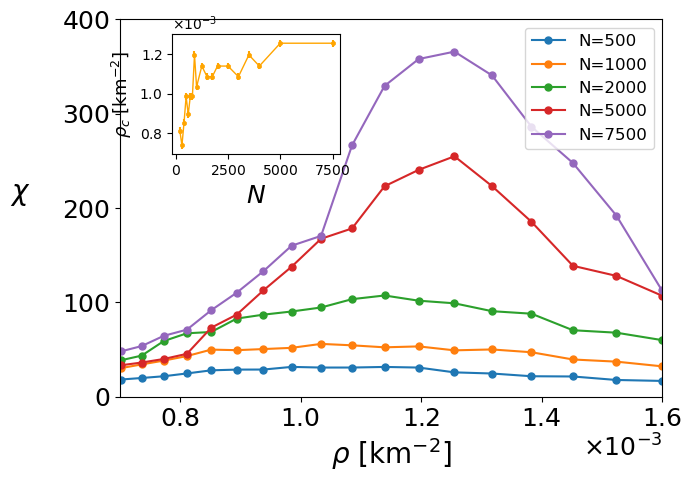

In [58]:
Ns = [500, 1000,2000,5000,7500]
# Creazione del plot principale
fig, ax = plt.subplots()
plt.rcParams['axes.formatter.use_mathtext'] = True
d_h=float('inf')


# Impostazione delle etichette
ax_fs = 20
ax.set_xlabel(r'$\rho \ [$km$^{-2}]$', fontsize=ax_fs)
ax.set_ylabel(r'$\chi$', fontsize=ax_fs, rotation=0, labelpad=30)
ax.set_xlim(0.0007,0.0016)
ax.set_ylim(0,400)
ax.xaxis.offsetText.set_fontsize(18)

for i in range(len(Ns)):
    N=Ns[i]
    fn1 = 'cluster_outs/out_hybrid_rhos_conn_N%d_d_hyb' % N + str(d_h) +'_NX_focus_ratemin0_40nws.dat'
    data5 = np.loadtxt(fn1)
    rhos = data5[0]
    conn = data5[1]
    errc = data5[2]          # fluctuations of the relative size (0 to 1), we want the absolute

    ax.plot(rhos, errc*N, 'o-', label='N=%d'%N, alpha=1, markersize=5, linewidth=1.5)

#########################################
xs = []
Ns = [200,300,400,500,600,700,800,900]+list(np.arange(1000,2000,250))+list(np.arange(2000,4001,500))+[5000,7500]
for i in range(len(Ns)):
    N=Ns[i]
    fn1 = 'cluster_outs/out_hybrid_rhos_conn_N%d_d_hyb' % N + str(d_h) +'_NX_focus_ratemin0_40nws.dat'
    data7 = np.loadtxt(fn1)
    rhos = data7[0]
    susc = data7[2]*N
    xs.append(rhos[np.argmax(susc)])    


# inset plot
inset_ax = fig.add_axes([0.2, 0.61, 0.24, 0.24])
inset_ax.plot(Ns, xs, '.-',color='orange', linewidth=1, markeredgewidth=.5)
rho_ebar=(rhos[1]-rhos[0])/2
inset_ax.errorbar(Ns, xs, rho_ebar, fmt=' ', color='orange')

# Impostazione delle etichette del plot inset
fs_inset=10
inset_ax.set_xlabel('$N$')#, fontsize=fs_inset+3)
inset_ax.set_ylabel(r'$\rho_c\ [$km$^{-2}]$', fontsize=fs_inset+3)
# to tune ticklabels font size:
inset_ax.tick_params(axis='both', which='major', labelsize=fs_inset)
# to force expo format in inset
inset_ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
# to set fontsize of order of magn in inset y axis
inset_ax.yaxis.offsetText.set_fontsize(fs_inset)
#inset_ax.set_xscale('log')

ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

from matplotlib.ticker import ScalarFormatter

formatter = ScalarFormatter()
formatter.set_powerlimits((-3, 3))  # Limita la notazione esponenziale da -3 a 3
formatter.set_scientific(True)  # Utilizza la notazione scientifica
formatter.set_useMathText(True)  # Utilizza il formato testo per la notazione scientifica

inset_ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)

ax.legend(loc=1, fontsize=12)
plt.savefig('plots/CV_susceptibilities_w_inset.png')


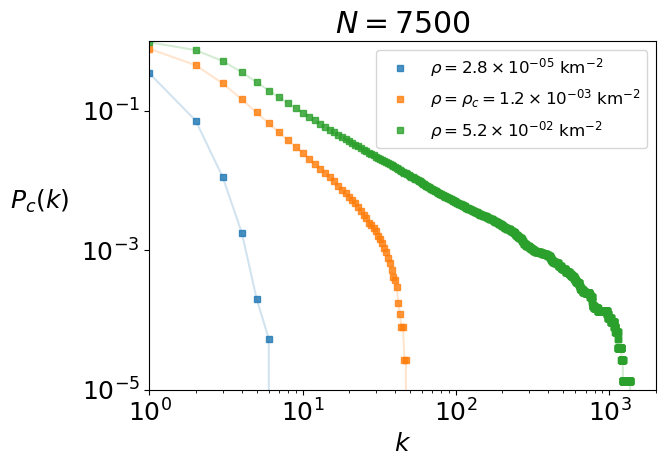

In [52]:
N=7500
data = np.loadtxt('cluster_outs/out_hybrid_rhos_degr_N'+str(N)+'_d_hybinf_NX_wide_ratemin0_10nws.dat')
R, C = data.shape
rhos=data[0]
deg_dists=data[1:]
# from the definition of CCDF one should sum up to the k-1-th element, but cumsum sums up to the k-th one. adding a row of zeros fixes the issues,
# effectively translating the curves by 1 
deg_dists_zero_col = np.vstack((np.zeros(shape=(1,deg_dists.shape[1])), deg_dists))
comp_cum_distr = 1-np.cumsum(deg_dists_zero_col, axis=0)/N

c=0
for r in range(3,C,16):
    avg_k = np.average(data[1:,r]*np.arange(1,R))         # index of a row is the degree 
    label = r'$\rho = {:.1e}$'.format(rhos[r]).replace('e', r' \times 10^{')[:-1] + '}$' + ' km$^{-2}$'
    plt.plot(range(len(comp_cum_distr[:,r])), comp_cum_distr[:,r], 's', label=label, ms=4, alpha=.8)
    plt.plot(range(len(comp_cum_distr[:,r])), comp_cum_distr[:,r], '-', alpha=.2, color=cmap(c))
    c+=1

legend = plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()


# Modify the second label (element 3+16=19)
labels[1] = r'$\rho = \rho_c = {:.1e}$'.format(rhos[19]).replace('e', r' \times 10^{')[:-1] + '}$' + ' km$^{-2}$'

# Update the legend with the new labels
plt.legend(handles, labels, fontsize=12)

# plt.legend(fontsize=12)
plt.xlabel(r'$k$')
plt.ylabel('$P_c(k)$', rotation=0, labelpad=30)
# plt.ylabel('$\int_0^k n(k\')dk\'$')
plt.title('$N=%d$'%N)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,2000)
plt.ylim(1e-5,1)
#plt.grid()
plt.tight_layout()
plt.savefig('plots/compl_cumul_degr_distribution_N%d.png'%N)

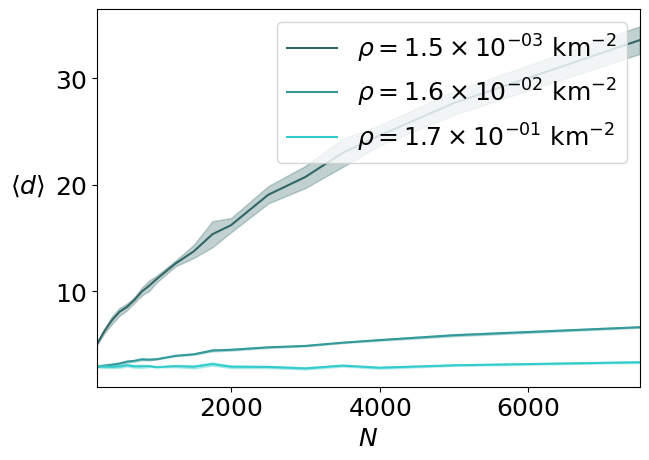

In [53]:
Ns = [200,300,400,500,600,700,800,900]+list(np.arange(1000,2000,250))+list(np.arange(2000,4001,500))+[5000,7500]

cmap = plt.get_cmap("tab10")   # dflt sequence of colors
i=0
markers = ['o', 's', '^', 'v', '.', 'D']
densities = np.loadtxt('cluster_outs/out_hybrid_rhos_topd_N200_d_hybinf_NX_wide_ratemin0_10nws.dat')[0]
n_rhos = len(densities)
for r in range(20,n_rhos,10):
    rho = densities[r]
    datalist = []
    ebarlist = []
    for N in Ns:
        fn = 'cluster_outs/out_hybrid_rhos_topd_N%d_d_hybinf_NX_wide_ratemin0_10nws.dat'%N
        raw = np.loadtxt(fn)
        
        rhos = raw[0]
        shpthlens = raw[1]
        sp_ebar = raw[2]
        idx_rho = np.argmin( abs(rhos-rho) )
        datalist.append(shpthlens[idx_rho])
        ebarlist.append(sp_ebar[idx_rho])
    label = r'$\rho = {:.1e}$'.format(rhos[r]).replace('e', r' \times 10^{')[:-1] + '}$' + ' km$^{-2}$'
    plt.plot(Ns, datalist, '-', label=label,color=(0.2, float(r)/n_rhos, float(r)/n_rhos))
    #plt.errorbar(Ns, datalist, ebarlist, fmt = ' ',color=(0.2, float(r)/n_rhos, float(r)/n_rhos))
    plt.fill_between(Ns, np.array(datalist)-ebarlist, np.array(datalist)+ebarlist, alpha=0.3,color=(0.2, float(r)/n_rhos, float(r)/n_rhos))

    i += 1

plt.xlabel('$N$')
plt.ylabel(r'$\langle d \rangle$', rotation=0, labelpad=20)
plt.legend()
plt.xlim(Ns[0],Ns[-1])
# plt.grid(which="major")
# plt.grid(which="minor", alpha=0.5, ls=':')
plt.savefig('plots/smallworld.png')

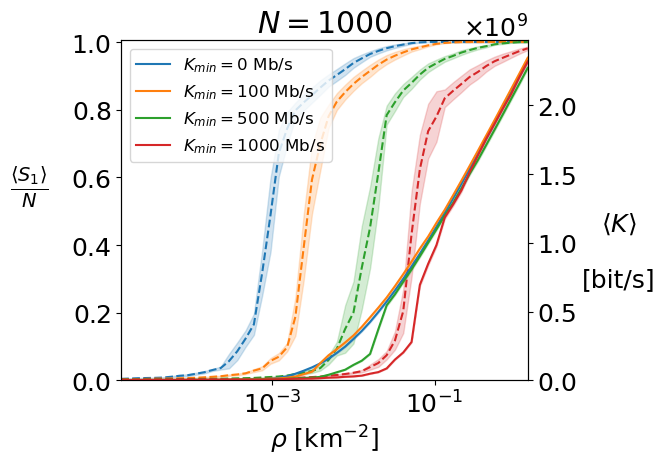

In [54]:
N=1000
qkd='CV'
cmap = plt.get_cmap("tab10")   # dft sequence of colors

thresholds = [0,100000000,500000000,1000000000]
c=0
ls=['-','--','-.',':',(5, (10, 3))]
ms = 3


fig, ax1 = plt.subplots()
ax1.set_xlabel(r'$\rho$ [km$^{-2}$]')
#ax1.grid(which="major")
#ax1.grid(which="minor", alpha=0.5, ls=':')
ax1.set_ylabel(r'$\frac{\langle S_1\rangle}{N}$', rotation=0, labelpad=30, fontsize=20)
ax2 = ax1.twinx()
ax2.set_ylabel(r'$\langle K \rangle$'+'\n\n[bit/s]', rotation=0, labelpad=30)

for th in thresholds:
    CV_conn=np.loadtxt('cluster_outs/out_hybrid_rhos_conn_N%d_d_hybinf_NX_wide_ratemin%d_10nws.dat'%(N,th))
    rhos = CV_conn[0]
    C = CV_conn[1]
    err_C = CV_conn[2]
    
    CV_parK=np.loadtxt('cluster_outs/out_hybrid_rhos_parK_N%d_d_hybinf_NX_wide_ratemin%d_10nws.dat'%(N,th))
    rhos = CV_parK[0]
    K = CV_parK[1]
    err_K = CV_parK[2]

    ax1.plot(rhos, C, '--', color=cmap(c), markersize=ms)
#     ax1.errorbar(rhos, C, err_C , fmt=' ', color=cmap(c))
    ax1.fill_between(CV_conn[0], CV_conn[1] - CV_conn[2], CV_conn[1] + CV_conn[2], color=cmap(c), alpha=0.2)
    
    ax2.plot(rhos, K, '-', color=cmap(c), markersize=ms, label='$K_{min}=$%.0f Mb/s'%(th/1000000))   # putting label here to have solid line in legend
#     ax2.errorbar(rhos, K, err_K , fmt=' ', color=cmap(c))
    ax2.fill_between(CV_parK[0], CV_parK[1] - CV_parK[2], CV_parK[1] + CV_parK[2], color=cmap(c), alpha=0.2)
    
    # this was a trick to put 'o' markers with proper colors in the legend
    # ax1.plot(-1,0,'o', label='$K_{min}=$%.0f Mb/s'%(th/1000000), color=cmap(c), markersize=ms)
    c += 1

# plt.title(qkd+', N='+str(N))
# ax1.plot(-1,0,ls=ls[1], color='gray', label=r'connectivity $\frac{\langle S_1\rangle}{N}$')
# ax1.plot(-1,0,ls=ls[0], color='gray', label=r'avg rate $\langle K\rangle$')
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
ax1.set_ylim(0,1.005)
plt.xscale('log')
plt.title('$N=%d$'%N)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)
plt.xlim(1.4E-5,1.4E0)
plt.tight_layout()
plt.savefig('plots/CV_conn_rate_withRmin.png')



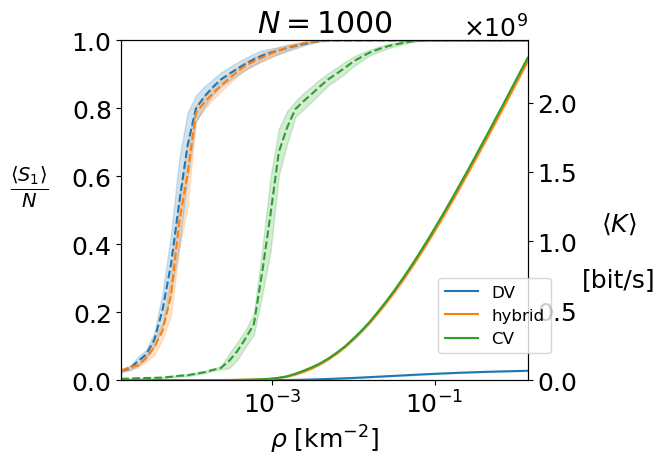

In [55]:
rho_bar = 10**-2                          # the desired value of rho
N=1000

dhs = [0, 91, float('inf')]
labels = ['DV', 'hybrid', 'CV']
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'$\rho$ [km$^{-2}$]')
# ax1.grid(which="major")
# ax1.grid(which="minor", alpha=0.5, ls=':')
ax1.set_ylabel(r'$\frac{\langle S_1\rangle}{N}$', rotation=0, labelpad=30, fontsize=20, alpha=1)
ax2 = ax1.twinx()
ax2.set_ylabel(r'$\langle K \rangle$'+'\n\n[bit/s]', rotation=0, labelpad=30)
cmap = plt.get_cmap("tab10")   # dft sequence of colors

rate_dh, conn_dh, rate_ebars, conn_ebars = [], [], [], []
for i in range(len(dhs)):
    dh=dhs[i]
    conn=np.loadtxt('cluster_outs/out_hybrid_rhos_conn_N%d_d_hyb%.0f_NX_wide_ratemin0_10nws.dat' % (N,dh))
    rate=np.loadtxt('cluster_outs/out_hybrid_rhos_parK_N%d_d_hyb%.0f_NX_wide_ratemin0_10nws.dat' % (N,dh))
    ax1.plot(conn[0],conn[1], '--')
    ax2.plot(rate[0],rate[1], '-', label=labels[i])
#     ax1.errorbar(conn[0], conn[1], conn[2] , fmt=' ', color=cmap(i))
#     ax2.errorbar(rate[0], rate[1], rate[2], fmt=' ', color=cmap(i))
    ax1.fill_between(conn[0], conn[1] - conn[2], conn[1] + conn[2], color=cmap(i), alpha=0.2)
    ax2.fill_between(rate[0], rate[1] - rate[2], rate[1] + rate[2], color=cmap(i), alpha=0.2)

    
ax1.set_ylim(0,1)
ax2.set_ylim(bottom=0)#, top=2000000)
ax1.set_xlim(1.4e-5,1.4)
# ax1.plot(-1,0,ls='--', color='gray', label=r'$\frac{\langle S_1\rangle}{N}$', alpha=1)
# ax1.plot(-1,0,ls='-', color='gray', label=r'$\langle K \rangle$ [bit/s]')
# ax1.plot(-1,0,ls='--', color='gray', alpha=0, label=' ')
ax2.set_xscale('log')
plt.title('$N=%d$'%N)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=(0.78,0.08), fontsize=12)
#ax2.set_yscale('log')
plt.tight_layout()
plt.savefig('plots/DV_CV_hybrid_comparison.png')

1.5147411482578643
3.2724220623501195
7.231739314430809


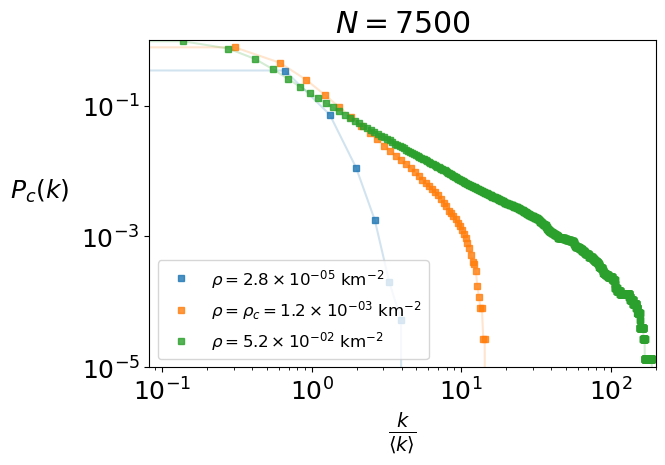

In [56]:
N=7500
data = np.loadtxt('cluster_outs/out_hybrid_rhos_degr_N'+str(N)+'_d_hybinf_NX_wide_ratemin0_10nws.dat')
R, C = data.shape
rhos=data[0]
# from the definition of CCDF one should sum up to the k-1-th element, but cumsum sums up to the k-th one. adding a row of zeros fixes the issues,
# effectively translating the curves by 1 
deg_dists_zero_col = np.vstack((np.zeros(shape=(1,deg_dists.shape[1])), deg_dists))
comp_cum_distr = 1-np.cumsum(deg_dists_zero_col, axis=0)/N



c=0
for r in range(3,C,16):
    avg_k = np.average(data[1:,r]*np.arange(1,R))         # index of a row is the degree 
    print(avg_k)
    label = r'$\rho = {:.1e}$'.format(rhos[r]).replace('e', r' \times 10^{')[:-1] + '}$' + ' km$^{-2}$'
    plt.plot(range(len(comp_cum_distr[:,r]))/avg_k, comp_cum_distr[:,r], 's', label=label, ms=4, alpha=.8)
    plt.plot(range(len(comp_cum_distr[:,r]))/avg_k, comp_cum_distr[:,r], '-', alpha=.2, color=cmap(c))
    c+=1
legend = plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()


# Modify the second label (element 3+16=19)
labels[1] = r'$\rho = \rho_c = {:.1e}$'.format(rhos[19]).replace('e', r' \times 10^{')[:-1] + '}$' + ' km$^{-2}$'

# Update the legend with the new labels
plt.legend(handles, labels, fontsize=12)
plt.xlabel(r'$\frac{k}{\langle k\rangle}$', fontsize=20)
plt.ylabel('$P_c(k)$', rotation=0, labelpad=30)
# plt.ylabel('$\int_0^k n(k\')dk\'$')
plt.title('$N=%d$'%N)
plt.xscale('log')
plt.yscale('log')
plt.xlim(right=200)
plt.ylim(1e-5,1)
#plt.grid()
plt.tight_layout()
plt.savefig('plots/collapsed_compl_cumul_degr_distribution_N%d.png'%N)